In [56]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
#To install xgboost library use - !pip install xgboost 
from xgboost import XGBClassifier

In [57]:
cars_df = pd.read_csv('./Cars-dataset.csv')
cars_df.head()

,Age,Gender,Engineer,MBA,Work Exp,Salary,Distance,license,Opt_service
0,28,Male,1,0,5,14.4,5.1,0,0
1,24,Male,1,0,6,10.6,6.1,0,0
2,27,Female,1,0,9,15.5,6.1,0,0
3,25,Male,0,0,1,7.6,6.3,0,0
4,25,Female,0,0,3,9.6,6.7,0,0


In [58]:
cars_df.Opt_service.value_counts()

0    383
1     35
Name: Opt_service, dtype: int64

In [59]:
cars_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,418.0,27.334928,4.153272,18.0,25.000,27.0,29.000,43.0
Engineer,418.0,0.748804,0.434221,0.0,0.250,1.0,1.000,1.0
MBA,418.0,0.260766,0.439578,0.0,0.000,0.0,1.000,1.0
Work Exp,418.0,5.873206,4.816110,0.0,3.000,5.0,8.000,24.0
Salary,418.0,15.418421,9.660234,6.5,9.625,13.0,14.900,57.0
Distance,418.0,11.306220,3.722143,3.2,8.600,10.9,13.575,23.4
license,418.0,0.205742,0.404727,0.0,0.000,0.0,0.000,1.0
Opt_service,418.0,0.083732,0.277317,0.0,0.000,0.0,0.000,1.0


In [60]:
cars_df.Gender.replace(['Male', 'Female'], [0,1], inplace=True)

In [61]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          418 non-null    int64  
 1   Gender       418 non-null    int64  
 2   Engineer     418 non-null    int64  
 3   MBA          418 non-null    int64  
 4   Work Exp     418 non-null    int64  
 5   Salary       418 non-null    float64
 6   Distance     418 non-null    float64
 7   license      418 non-null    int64  
 8   Opt_service  418 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 29.5 KB


In [62]:
X = cars_df.drop(columns=['Opt_service'])
Y = cars_df.pop('Opt_service')


In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.30, random_state=1,stratify=Y)

In [64]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)

    train_F1 = metrics.f1_score(y_train,pred_train)
    test_F1 = metrics.f1_score(y_test,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))
        print("F1 score on the training set : ",train_F1)
        print("F1 score on the test set : ",test_F1)
    
    return score_list # returning the list with train and test scores

## Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_train)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [65]:
AB_class = AdaBoostClassifier(random_state=1)
AB_class.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

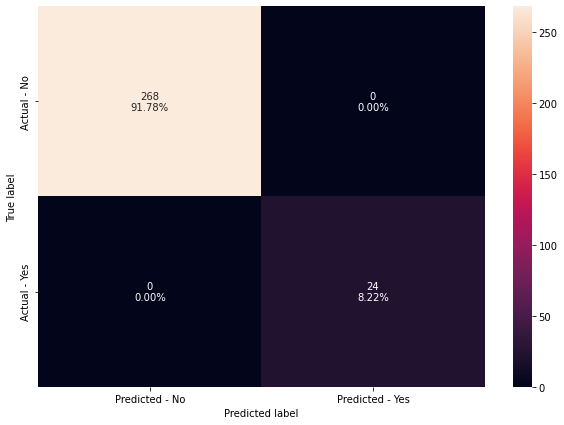

In [66]:
make_confusion_matrix(AB_class, y_train)

In [67]:
get_metrics_score(AB_class)

Accuracy on training set :  1.0
Accuracy on test set :  0.9682539682539683
Recall on training set :  1.0
Recall on test set :  0.7272727272727273
Precision on training set :  1.0
Precision on test set :  0.8888888888888888
F1 score on the training set :  1.0
F1 score on the test set :  0.7999999999999999


[1.0, 0.9682539682539683, 1.0, 0.7272727272727273, 1.0, 0.8888888888888888]

In [68]:
gbc = GradientBoostingClassifier(random_state=1)
gbc.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

In [69]:
get_metrics_score(gbc)

Accuracy on training set :  1.0
Accuracy on test set :  0.9603174603174603
Recall on training set :  1.0
Recall on test set :  0.9090909090909091
Precision on training set :  1.0
Precision on test set :  0.7142857142857143
F1 score on the training set :  1.0
F1 score on the test set :  0.8


[1.0, 0.9603174603174603, 1.0, 0.9090909090909091, 1.0, 0.7142857142857143]

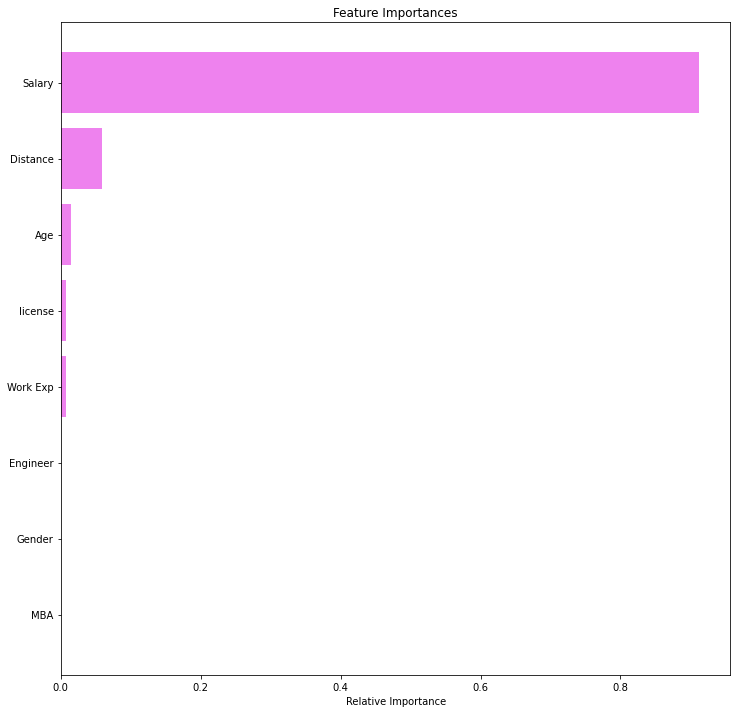

In [70]:
importances = gbc.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [71]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

dtc =  DecisionTreeClassifier(random_state=1)
bc = BaggingClassifier(random_state=1)
rfc = RandomForestClassifier(random_state=1)

clf = [('dtc',dtc),('bc',bc)] #list of (str, estimator)

stack_model = StackingClassifier( estimators = clf, final_estimator = rfc)

stack_model.fit(X_train,y_train)

get_metrics_score(stack_model)

Accuracy on training set :  0.9965753424657534
Accuracy on test set :  0.9444444444444444
Recall on training set :  1.0
Recall on test set :  0.9090909090909091
Precision on training set :  0.96
Precision on test set :  0.625
F1 score on the training set :  0.9795918367346939
F1 score on the test set :  0.7407407407407406


[0.9965753424657534, 0.9444444444444444, 1.0, 0.9090909090909091, 0.96, 0.625]

In [72]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

abc =  AdaBoostClassifier(random_state=1)
gbc = GradientBoostingClassifier(random_state=1)
xbg = XGBClassifier(random_state=1,eval_metric = 'logloss')

clf = [('abc',abc),('gbc',gbc)] #list of (str, estimator)

stack_model = StackingClassifier( estimators = clf, final_estimator = xbg)

stack_model.fit(X_train,y_train)

get_metrics_score(stack_model)

Accuracy on training set :  1.0
Accuracy on test set :  0.9682539682539683
Recall on training set :  1.0
Recall on test set :  0.7272727272727273
Precision on training set :  1.0
Precision on test set :  0.8888888888888888
F1 score on the training set :  1.0
F1 score on the test set :  0.7999999999999999


[1.0, 0.9682539682539683, 1.0, 0.7272727272727273, 1.0, 0.8888888888888888]